Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils 

%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

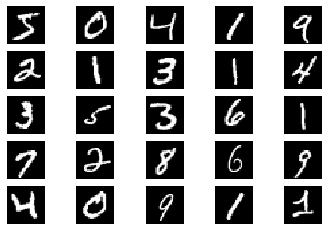

'\nnp.random.seed(1234)\nfor i in range(60000):\n    np.random.shuffle(X_train[i])\nfor i in range(10000):\n    np.random.shuffle(X_test[i])\n\n'

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

show_imgs(X_train)

'''
np.random.seed(1234)
for i in range(60000):
    np.random.shuffle(X_train[i])
for i in range(10000):
    np.random.shuffle(X_test[i])

'''

In [4]:
X_train =  X_train.reshape(60000, 784) #...                      change the shape towards (60000, 784)
X_test =   X_test.reshape(10000, 784)  # ...                     idem (10000, 784)
X_train =  X_train.astype('float32')   # ...                     change the type towards float32
X_test =   X_test.astype('float32')    # ...                     idem
X_train /= 255                         # ...                     normalize the range to be between 0.0 and 1.0
X_test /=  255                         # ...
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes) # ...                  modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)   # ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
E = 10                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST

# ... define the model as a Sequential type
# ... add a layer of type Dense with softmax activation

model = Sequential()
model.add(Dense(n_classes, input_shape=(D,), activation='softmax'))
# ... print model infomration with summary() method

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data

log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6030 - accuracy: 0.8508 - val_loss: 0.3432 - val_accuracy: 0.9080
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3309 - accuracy: 0.9083 - val_loss: 0.2996 - val_accuracy: 0.9164
Epoch 3/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3019 - accuracy: 0.9162 - val_loss: 0.2838 - val_accuracy: 0.9206
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2884 - accuracy: 0.9194 - val_loss: 0.2788 - val_accuracy: 0.9219
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2805 - accuracy: 0.9216 - val_loss: 0.2736 - val_accuracy: 0.9242
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2748 - accuracy: 0.9237 - val_loss: 0.2720 - val_accuracy: 0.9250
Epoch 7/10
60000/60000 [==============================] 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

In [12]:
def plot_loss_evolution(logobject):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(logobject.history['loss'], label='Training loss')
    ax1.plot(logobject.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(logobject.history['accuracy'], label='Training acc')
    ax2.plot(logobject.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

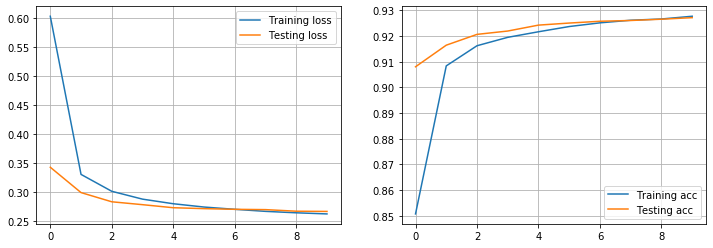

In [13]:
plot_loss_evolution(log)

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [9]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.26723588948249816
Test accuracy: 0.9271


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [10]:
pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

array([[ 955,    0,    2,    2,    0,    6,    9,    3,    3,    0],
       [   0, 1108,    4,    2,    0,    2,    4,    2,   13,    0],
       [   3,    6,  934,   16,    7,    3,   12,   10,   37,    4],
       [   2,    0,   20,  924,    0,   21,    2,   11,   23,    7],
       [   2,    1,    8,    1,  914,    0,    8,    4,   10,   34],
       [   7,    2,    2,   33,   10,  778,   16,    7,   31,    6],
       [   8,    3,    6,    1,    7,   14,  914,    2,    3,    0],
       [   1,    6,   22,    5,    8,    0,    0,  960,    3,   23],
       [   5,    6,    8,   20,    9,   26,    9,   14,  872,    5],
       [   9,    7,    2,   11,   28,    6,    0,   28,    6,  912]],
      dtype=int64)

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


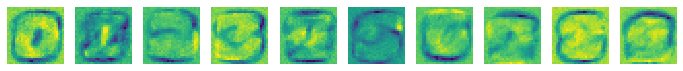

In [11]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:, i] #...                      get the weights landing to neuron i
    im = im.reshape(28,28) #...                      reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = im.min() #...                     get the min of im
    max = im.max() #...                     get the max of im
    im = (im - min) / (max - min) * 255 #...                      perform a min-max norm
    im = np.round(im).astype('int') #...                      convert to 8 bits pixel values
    ax.axis('off')
    ax.imshow(im)

# Exercise 2: Shallow networks with Keras on CIFAR10

Modify the example given in the class on the MNIST dataset to train and evaluate a shallow
networks on the CIFAR10 dataset. The CIFAR10 dataset is composed of 60’000 images equally
spread into 10 classes, i.e. with 6’000 images per class. 

The Figure 3 illustrates some images for each classes. Each images are 32x32 pixels with RGB channels. A single image can then
be stored in a numpy array of shape 32x32x3 . 

Use the loader provided in TensorFlow that will split the set into 50’000 images for training and 10’000 images for testing.


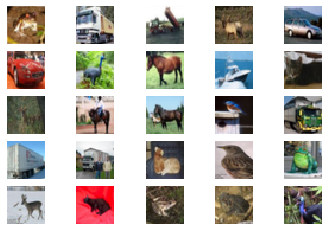

In [71]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_train)

In [72]:
X_train.shape

(50000, 32, 32, 3)

In [73]:
X_train =  X_train.reshape(50000, 32*32*3) # change the shape towards (50000, 32*32*3)
X_test =   X_test.reshape(10000, 32*32*3)  # idem (10000, 32*32*3)
X_train =  X_train.astype('float32')       # change the type towards float32
X_test =   X_test.astype('float32')        # idem
X_train /= 255                             # normalize the range to be between 0.0 and 1.0
X_test /=  255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [21]:
# one-hot encoding of target y_train
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes) # ...                  modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)   # ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## One-layer network and weight visualisation
Train a simple 1-layer dense network using the following parameters : 
* 5 epochs, 
* batch size = 128
* L2 regularizer (value of 0.05)
* softmax activation
* categorical-crossentropy loss
* adam optimizer. 

Report on the performance on the test set.
In a similar way as seen in class for the NIST database, plot the weights of the network. 
* Pay attention that here, the normalization of the weight values to 0-256 values should be done on a
per-channel basis (RGB).

In [122]:
from tensorflow.keras import regularizers

E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model = Sequential()
model.add(Dense(n_classes, input_shape=(D,), activation='softmax', kernel_regularizer=regularizers.l2(0.05)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


There are three different regularizers available (kernel, bias and activity). According to
* https://keras.io/regularizers/ and 
* https://stats.stackexchange.com/questions/383310/difference-between-kernel-bias-and-activity-regulizers-in-keras

we used a `kernel_regularizer` because we want to reduce the saturation of the weights.

In [123]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s 26us/sample - loss: 2.3190 - accuracy: 0.2991 - val_loss: 1.9864 - val_accuracy: 0.3456
Epoch 2/5
50000/50000 [==============================] - 1s 18us/sample - loss: 1.9954 - accuracy: 0.3299 - val_loss: 1.9873 - val_accuracy: 0.3365
Epoch 3/5
50000/50000 [==============================] - 1s 18us/sample - loss: 1.9913 - accuracy: 0.3292 - val_loss: 1.9905 - val_accuracy: 0.3046
Epoch 4/5
50000/50000 [==============================] - 1s 18us/sample - loss: 1.9869 - accuracy: 0.3317 - val_loss: 2.0201 - val_accuracy: 0.3178
Epoch 5/5
50000/50000 [==============================] - 1s 18us/sample - loss: 1.9861 - accuracy: 0.3308 - val_loss: 1.9938 - val_accuracy: 0.3250


## Evaluate the network

### Loss evolution during training

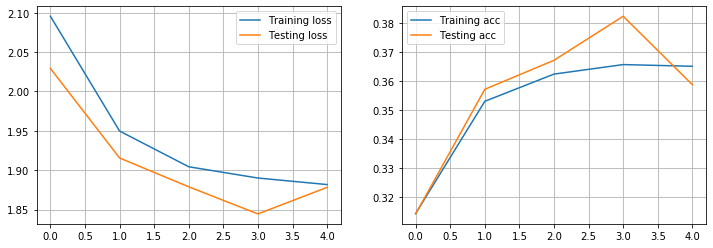

In [55]:
plot_loss_evolution(log)

### Model evaluation

In [80]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.8896344192504884
Test accuracy: 0.3475


### Confusion matrix

In [79]:
pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, pred)

array([[ 97,  55, 274,   9,  11,   5,  23,  19, 469,  38],
       [  9, 473,  92,   9,  18,  22,  45,  25, 201, 106],
       [ 10,  37, 541,  24,  62,  26, 120,  22, 140,  18],
       [  3,  78, 345,  96,  43, 120, 153,  16, 100,  46],
       [ 13,  35, 397,   7, 235,  26, 157,  40,  73,  17],
       [  1,  49, 351,  59,  67, 194, 114,  32, 113,  20],
       [  0,  54, 259,  29,  60,  33, 485,  13,  41,  26],
       [  7,  54, 298,  18,  91,  30,  63, 265, 110,  64],
       [ 12,  74,  93,   3,   8,  21,   9,   8, 726,  46],
       [ 10, 188,  64,   8,  14,  13,  52,  30, 258, 363]], dtype=int64)

### Plot the weights

In [58]:
def plot_weights_normalized_globally(wng):
    f = plt.figure(figsize=(12,12))
    for i in range(10):
        ax = f.add_subplot(1, 10, 1+i)
        im = wng[:, i] # get the weights landing to neuron i
        im = im.reshape(32,32,3) # reshape the vector of weights into 32x32x3 image
        # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
        min = im.min() # get the min of im
        max = im.max() # get the max of im
        im = (im - min) / (max - min) * 255 # perform a min-max norm
        im = np.round(im).astype('int') # convert to 8 bits pixel values
        ax.axis('off')
        ax.imshow(im)

In [100]:
def plot_weights_normalized_per_channel(wnpc):
    f = plt.figure(figsize=(12,12))
    for i in range(10):
        ax = f.add_subplot(1, 10, 1+i)
        im = wnpc[:, i] # get the weights landing to neuron i
        im = im.reshape(32,32,3) # reshape the vector of weights into 32x32x3 image
        
        # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
        for channel_idx in range(3):
            # perform a min-max norm per channel
            channel_data = im[:,:,channel_idx]
            min_channel = channel_data.min() # get the min of channel
            max_channel = channel_data.max() # get the max of channel
            im[:,:,channel_idx] = (channel_data - min_channel) / (max_channel - min_channel) * 255
        im = np.round(im).astype('int') # convert to 8 bits pixel values
        ax.axis('off')
        ax.imshow(im)

In [124]:
weights = model.get_weights()

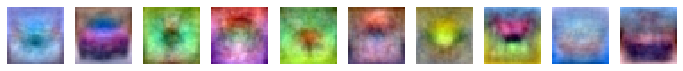

In [125]:
plot_weights_normalized_globally(weights[0].copy())

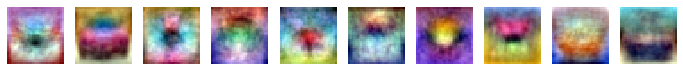

In [126]:
plot_weights_normalized_per_channel(weights[0].copy())

## Two-layers network


In [144]:
E = 30                # number of epochs
X = 128               # number of neurons in hidden layer
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model = Sequential()
model.add(Dense(X, input_shape=(D,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=2, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 2s - loss: 1.9554 - accuracy: 0.2989 - val_loss: 1.8280 - val_accuracy: 0.3409
Epoch 2/30
50000/50000 - 1s - loss: 1.7817 - accuracy: 0.3654 - val_loss: 1.7421 - val_accuracy: 0.3800
Epoch 3/30
50000/50000 - 1s - loss: 1.7289 - accuracy: 0.3838 - val_loss: 1.7214 - val_accuracy: 0.3866
Epoch 4/30
50000/50000 - 1s - loss: 1.6869 - accuracy: 0.4004 - val_loss: 1.6751 - val_accuracy: 0.4072
Epoch 5/30
50000/50000 - 1s - loss: 1.6683 - accuracy: 0.4064 - val_loss: 1.6887 - val_accuracy: 0.3866
Epoch 6/30
50000/50000 - 1s - loss: 1.6434 - accuracy: 0.4157 - val_loss: 1.6452 - val_accuracy: 0.4129
Epoch 7/30
50000/50000 - 1s - loss: 1.6243 - accuracy: 0.4222 - val_loss: 1.6129 - val_accuracy: 0.4305
Epoch 8/30
50000/50000 - 1s - loss: 1.6182 - accuracy: 0.4249 - val_loss: 1.6215 - val_accuracy: 0.4254
Epoch 9/30
50000/50000 - 1s - loss: 1.6016 - accuracy: 0.4291 - val_loss: 1.6137 - val_accuracy: 0.4259
Epoch 10/30
50

Test loss: 1.5623494274139405
Test accuracy: 0.4409


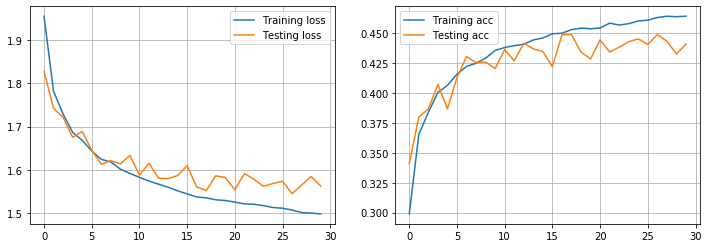

In [146]:
plot_loss_evolution(log)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Make some tuning on the hyperparameters in order to improve the performances, 
* e.g. by increasing the number of neurons 
* by adding fully connected layers. 

Report your best performance.

### 256 Neurons instead of 128

In [147]:
E = 30                # number of epochs
X = 256               # number of neurons in hidden layer
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model2 = Sequential()
model2.add(Dense(X, input_shape=(D,), activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log2 = model2.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=2, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 2s - loss: 1.9410 - accuracy: 0.3204 - val_loss: 1.7703 - val_accuracy: 0.3813
Epoch 2/30
50000/50000 - 2s - loss: 1.7446 - accuracy: 0.3840 - val_loss: 1.6879 - val_accuracy: 0.4008
Epoch 3/30
50000/50000 - 2s - loss: 1.6695 - accuracy: 0.4091 - val_loss: 1.6347 - val_accuracy: 0.4197
Epoch 4/30
50000/50000 - 2s - loss: 1.6175 - accuracy: 0.4288 - val_loss: 1.6089 - val_accuracy: 0.4268
Epoch 5/30
50000/50000 - 2s - loss: 1.5802 

Test loss: 1.45259313621521
Test accuracy: 0.4952


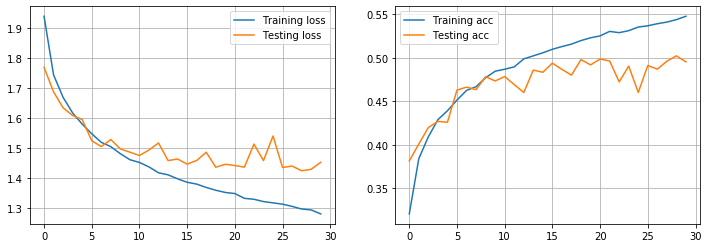

In [148]:
plot_loss_evolution(log2)
loss_test2, metric_test2 = model2.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test2)
print('Test accuracy:', metric_test2)

### Adding another Dense Layer

In [149]:
E = 30                # number of epochs
X = 128               # number of neurons in hidden layer
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model3 = Sequential()
model3.add(Dense(X, input_shape=(D,), activation='relu'))
model3.add(Dense(X, activation='relu'))
model3.add(Dense(n_classes, activation='softmax'))
model3.summary()
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log3 = model3.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=2, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 2s - loss: 1.8860 - accuracy: 0.3209 - val_loss: 1.7375 - val_accuracy: 0.3761
Epoch 2/30
50000/50000 - 2s - loss: 1.7035 - accuracy: 0.3929 - val_loss: 1.6681 - val_accuracy: 0.4100
Epoch 3/30
50000/50000 - 1s - loss: 1.6305 - accuracy: 0.4183 - val_loss: 1.5841 - val_accuracy: 0.4331
Epoch 4/30
5000

Test loss: 1.4419946336746217
Test accuracy: 0.4966


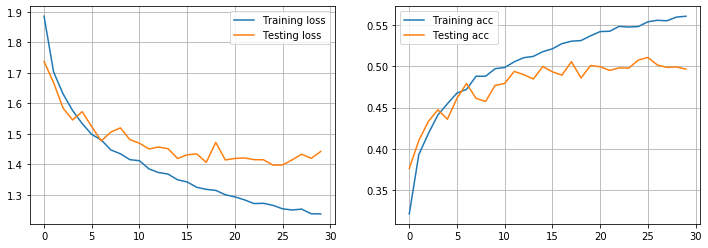

In [150]:
plot_loss_evolution(log3)
loss_test3, metric_test3 = model3.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test3)
print('Test accuracy:', metric_test3)

In [151]:
E = 30                # number of epochs
X = 256               # number of neurons in hidden layer
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model4 = Sequential()
model4.add(Dense(X, input_shape=(D,), activation='relu'))
model4.add(Dense(X, activation='relu'))
model4.add(Dense(n_classes, activation='softmax'))
model4.summary()
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log4 = model4.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=2, validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 3s - loss: 1.8892 - accuracy: 0.3200 - val_loss: 1.7475 - val_accuracy: 0.3819
Epoch 2/30
50000/50000 - 2s - loss: 1.6766 - accuracy: 0.4005 - val_loss: 1.6259 - val_accuracy: 0.4217
Epoch 3/30
50000/50000 - 2s - loss: 1.6046 - accuracy: 0.4294 - val_loss: 1.5514 - val_accuracy: 0.4503
Epoch 4/30
5000

Test loss: 1.4298200052261352
Test accuracy: 0.5131


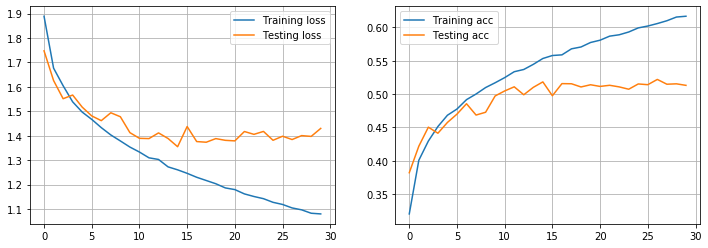

In [152]:
plot_loss_evolution(log4)
loss_test4, metric_test4 = model4.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test4)
print('Test accuracy:', metric_test4)

In [156]:
E = 30                # number of epochs
X1 = 512               # number of neurons in hidden layer1
X2 = 128               # number of neurons in hidden layer2
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 3072 for CIFAR10

model5 = Sequential()
model5.add(Dense(X1, input_shape=(D,), activation='relu'))
model5.add(Dense(X2, activation='relu'))
model5.add(Dense(n_classes, activation='softmax'))
model5.summary()
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log5 = model5.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=2, validation_data=(X_test, Y_test))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_38 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 - 4s - loss: 1.9331 - accuracy: 0.3125 - val_loss: 1.7427 - val_accuracy: 0.3866
Epoch 2/30
50000/50000 - 3s - loss: 1.7140 - accuracy: 0.3862 - val_loss: 1.6268 - val_accuracy: 0.4235
Epoch 3/30
50000/50000 - 3s - loss: 1.6338 - accuracy: 0.4167 - val_loss: 1.5812 - val_accuracy: 0.4390
Epoch 4/30


Test loss: 1.3959127365112305
Test accuracy: 0.5294


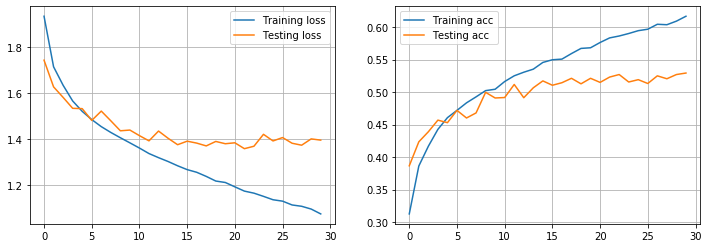

In [157]:
plot_loss_evolution(log5)
loss_test5, metric_test5 = model5.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test5)
print('Test accuracy:', metric_test5)

### Summary Performances
| Model | Descirption                                | Accuracy | Loss    |
|-------|:-------------------------------------------|----------|--------:|
| # 1   | Hidden(128) + Softmax Output               | 0.4409   |  1.5623 |
| # 2   | Hidden(256) + Softmax Output               | 0.4952   |  1.4525 |
| # 3   | Hidden(128) + Hidden(128) + Softmax Output | 0.4966   |  1.4419 |
| # 4   | Hidden(512) + Hidden(128) + Softmax Output | 0.5294   |  1.3959 |



# Exercise 3: CNN with Keras on CIFAR10

## Simple CNN

In [178]:
# Load Cifar10 Data again to ensure clean environment
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train =  X_train.astype('float32')       # change the type towards float32
X_test =   X_test.astype('float32')        # idem
X_train /= 255                             # normalize the range to be between 0.0 and 1.0
X_test /=  255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot encoding of target y_train
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)   # idem 
print(Y_train[:10])

50000 train samples
10000 test samples
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [179]:
init_cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3,), activation='relu', strides=1, padding='same'),
    Dense(32, activation='relu'),
    MaxPooling2D((2, 2)),    
    # Conv2D(32, kernel_size=(3,3), activation='relu'),
    Flatten(),
    # Dense(units=128, activation='relu', activity_regularizer=l2(1e-2)),
    # Dropout(0.2),
    Dense(units=10, activation='softmax')
])

init_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
init_cnn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dense_56 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                81930     
Total params: 83,882
Trainable params: 83,882
Non-trainable params: 0
_________________________________________________________________


In [180]:
log_init = init_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 352us/sample - loss: 1.6901 - accuracy: 0.4047 - val_loss: 1.4291 - val_accuracy: 0.5013
Epoch 2/30
50000/50000 [==============================] - 17s 341us/sample - loss: 1.3489 - accuracy: 0.5305 - val_loss: 1.3019 - val_accuracy: 0.5378
Epoch 3/30
50000/50000 [==============================] - 17s 348us/sample - loss: 1.2433 - accuracy: 0.5666 - val_loss: 1.2685 - val_accuracy: 0.5519
Epoch 4/30
50000/50000 [==============================] - 17s 344us/sample - loss: 1.1728 - accuracy: 0.5909 - val_loss: 1.2250 - val_accuracy: 0.5679
Epoch 5/30
50000/50000 [==============================] - 17s 338us/sample - loss: 1.1234 - accuracy: 0.6098 - val_loss: 1.2159 - val_accuracy: 0.5698
Epoch 6/30
50000/50000 [==============================] - 17s 337us/sample - loss: 1.0876 - accuracy: 0.6233 - val_loss: 1.1408 - val_accuracy: 0.5998
Epoch 7/30
50000/50000 [====================

Test loss: 1.0786346515655518
Test accuracy: 0.6363


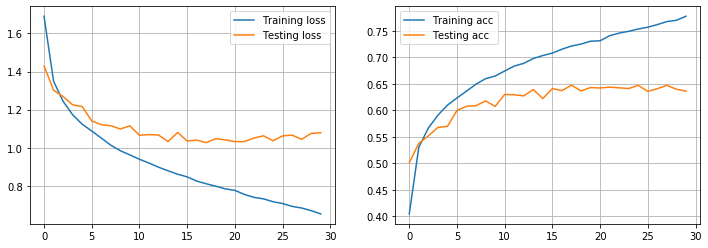

In [181]:
plot_loss_evolution(log_init)
loss_test, metric_test = init_cnn.evaluate(X_test, Y_test, verbose=0) # evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

## Deeper CNN

In [182]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, Flatten

cnn = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(32,32,3,), activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((4, 4)),
    
    # Conv2D(32, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(units=128, activation='relu', activity_regularizer=l2(1e-2)),
    Dropout(0.2),
    Dense(units=10, activation='softmax')
])

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               200832    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 10)              

In [183]:
log_cnn = cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.7193 - accuracy: 0.4220 - val_loss: 1.4414 - val_accuracy: 0.5392
Epoch 2/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.3415 - accuracy: 0.5702 - val_loss: 1.2255 - val_accuracy: 0.6128
Epoch 3/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.1827 - accuracy: 0.6247 - val_loss: 1.1510 - val_accuracy: 0.6369
Epoch 4/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.0821 - accuracy: 0.6588 - val_loss: 1.0511 - val_accuracy: 0.6695
Epoch 5/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.0032 - accuracy: 0.6821 - val_loss: 1.0003 - val_accuracy: 0.6789
Epoch 6/20
50000/50000 [==============================] - 50s 990us/sample - loss: 0.9564 - accuracy: 0.7006 - val_loss: 0.9805 - val_accuracy: 0.6910
Epoch 7/20
50000/50000 [==============================

Test loss: 0.885753502368927
Test accuracy: 0.723


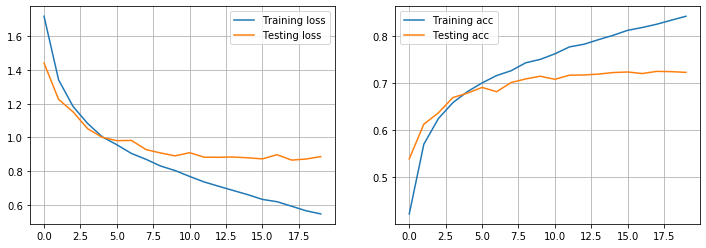

In [184]:
plot_loss_evolution(log_cnn)
loss_test, metric_test = cnn.evaluate(X_test, Y_test, verbose=0) # evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)